#  COMP30850 Assignment 1

Student Number: 20368431 

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Collecting the Datasets 

First I will collect the two datasets

In [2]:
#open the first file in read mode and store it in a variable
json_file = open("20368431-dataset1.json","r")
#then load that using json.load store that in dataset1
dataset1 = json.load( json_file )
#then close the intial file
json_file.close()

In [3]:
dataset1

[{'id': '0000114',
  'name': 'Steve Buscemi',
  'born': '1957-12-13',
  'movies': [{'id': '11702252',
    'title': 'The Year Between',
    'year': 2022,
    'kind': 'movie'},
   {'id': '9848626',
    'title': 'Hotel Transylvania 4: Transformania',
    'year': 2022,
    'kind': 'movie'},
   {'id': '10682266',
    'title': 'Hubie Halloween',
    'year': 2020,
    'kind': 'movie'},
   {'id': '9686708',
    'title': 'The King of Staten Island',
    'year': 2020,
    'kind': 'movie'},
   {'id': '8695030',
    'title': "The Dead Don't Die",
    'year': 2019,
    'kind': 'movie'},
   {'id': '5220122',
    'title': 'Hotel Transylvania 3: Summer Vacation',
    'year': 2018,
    'kind': 'movie'},
   {'id': '6821012', 'title': 'The Week Of', 'year': 2018, 'kind': 'movie'},
   {'id': '6509058', 'title': 'Nancy', 'year': 2018, 'kind': 'movie'}]},
 {'id': '0654339',
  'name': 'Ciaran Owens',
  'born': '1985-00-00',
  'movies': [{'id': '0318411',
    'title': 'The Magdalene Sisters',
    'year': 2002

In [4]:
#do the same as above for dataset2
json_file = open("20368431-dataset2.json","r")
dataset2 = json.load( json_file )
json_file.close()

In [5]:
dataset2

[{'id': '001715',
  'name': 'George C. Scott',
  'born': '1927-10-18',
  'movies': [{'id': '0120683',
    'title': 'Gloria',
    'year': 1999,
    'kind': 'movie'},
   {'id': '0115392', 'title': 'Titanic', 'year': 1996, 'kind': 'movie'},
   {'id': '0112368', 'title': 'Angus', 'year': 1995, 'kind': 'movie'},
   {'id': '0107497', 'title': 'Malice', 'year': 1993, 'kind': 'movie'},
   {'id': '0100477',
    'title': 'The Rescuers Down Under',
    'year': 1990,
    'kind': 'movie'},
   {'id': '0099528',
    'title': 'The Exorcist III',
    'year': 1990,
    'kind': 'movie'},
   {'id': '0088579',
    'title': 'Mussolini: The Untold Story',
    'year': 1985,
    'kind': 'movie'},
   {'id': '0087262', 'title': 'Firestarter', 'year': 1984, 'kind': 'movie'},
   {'id': '0083169', 'title': 'Taps', 'year': 1981, 'kind': 'movie'},
   {'id': '0080754', 'title': 'The Formula', 'year': 1980, 'kind': 'movie'},
   {'id': '0080516', 'title': 'The Changeling', 'year': 1980, 'kind': 'movie'},
   {'id': '0079

## Task 1 : Network Construction for dataset1

Now for the first task I will parse the JSON data to make it useable to create a network. For both networks I will create a weighted undirected graph. I will use an undirected graph as there is no direction in the movies actors work in. It is impossible for actors a and b to be in the same movie and for actor a to be not connected to actor b. Both will be weighted as some actors work together more than others and this could give a better picture on relationships.

In [6]:
#create an undirected graph
g1 = nx.Graph()
#for every person in dataset1 I will get their name and make it a node using 
for char in dataset1:
    g1.add_node( char["name"] )

In [7]:
#check the number of nodes
g1.number_of_nodes()

193

In [8]:
#I will create a dictionary moviesDict which will store an actor and the list of movies they appeared in
moviesDict = {}
for i in dataset1:
    moviesDict[ i["name"]] = list(i["movies"])

moviesDict

{'Steve Buscemi': [{'id': '11702252',
   'title': 'The Year Between',
   'year': 2022,
   'kind': 'movie'},
  {'id': '9848626',
   'title': 'Hotel Transylvania 4: Transformania',
   'year': 2022,
   'kind': 'movie'},
  {'id': '10682266',
   'title': 'Hubie Halloween',
   'year': 2020,
   'kind': 'movie'},
  {'id': '9686708',
   'title': 'The King of Staten Island',
   'year': 2020,
   'kind': 'movie'},
  {'id': '8695030',
   'title': "The Dead Don't Die",
   'year': 2019,
   'kind': 'movie'},
  {'id': '5220122',
   'title': 'Hotel Transylvania 3: Summer Vacation',
   'year': 2018,
   'kind': 'movie'},
  {'id': '6821012', 'title': 'The Week Of', 'year': 2018, 'kind': 'movie'},
  {'id': '6509058', 'title': 'Nancy', 'year': 2018, 'kind': 'movie'}],
 'Ciaran Owens': [{'id': '0318411',
   'title': 'The Magdalene Sisters',
   'year': 2002,
   'kind': 'movie'},
  {'id': '0294703', 'title': 'Mapmaker', 'year': 2001, 'kind': 'movie'},
  {'id': '0145653', 'title': "Angela's Ashes", 'year': 1999,

In [9]:
import itertools

#next for each actor compare them to the other actors and if actor1 and 2 have the same movie in their list add an edge.
for pair in itertools.combinations(moviesDict.keys(), r=2):     
    for a in range(len(moviesDict[pair[0]])):
        for b in range(len(moviesDict[pair[1]])):
            #if actor1's movie a is the same as actor2's b add an edge. Except if actor1 and actor2 are the same person 
            if moviesDict[pair[0]][a] == moviesDict[pair[1]][b]:
                #if actor1 and actor2 already have an edge increment the weight by 1
                    if g1.has_edge(pair[0], pair[1]) or g1.has_edge(pair[1], pair[0]):
                        g1[pair[0]][pair[1]] ["weight"] += 1
                    # else create a new edge with a weight of 1
                    else:
                        g1.add_edge(pair[0], pair[1], weight=1)                    
print(g1)

Graph with 193 nodes and 471 edges


In [10]:
# convert the edges in the network to a Pandas DataFrame
df = nx.to_pandas_edgelist(g1)
df.head(10)

,source,target,weight
0,Steve Buscemi,Ben Stiller,1
1,Steve Buscemi,Tilda Swinton,1
2,Steve Buscemi,Bill Murray,1
3,Steve Buscemi,Marisa Tomei,1
4,Steve Buscemi,Adam Driver,1
5,Ciaran Owens,Eamonn Owens,1
6,Ciaran Owens,Devon Murray,1
7,Christopher Walken,Susan Sarandon,1
8,Christopher Walken,Bill Murray,1
9,Christopher Walken,Glenn Close,1


In [11]:
# sort the rows by weight 
df.sort_values(by="weight", ascending=False).head(10)

,source,target,weight
38,Oliver Phelps,James Phelps,7
43,Oliver Phelps,Devon Murray,5
293,Saoirse Ronan,Timothée Chalamet,4
310,Adam Driver,Daisy Ridley,3
66,Julie Walters,Colin Firth,3
224,Chris Evans,Mark Ruffalo,3
222,Chris Evans,Gwyneth Paltrow,3
385,Brie Larson,Mark Ruffalo,3
217,Chris Evans,William Hurt,3
254,Carrie Fisher,Peter Mayhew,3


The Phelps brothers have appeared in the most movies together which is unsurprising due to the fact they plated twin brothers in the Harry Potter series.

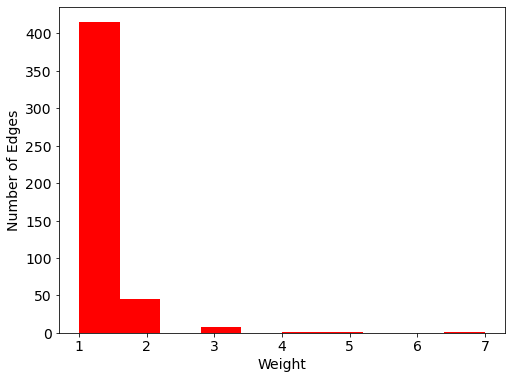

In [12]:
ax = df.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="red")
ax.set_ylabel("Number of Edges", fontsize=14)
ax.set_xlabel("Weight", fontsize=14);

Shown by the histogram above is the distribution of edge weights. We can see, that most actors in dataset1 appear in one movie together and everything outside of that is an outlier.

Next I must remove all isolated nodes.

In [13]:
#first i wish to see a list of the isolated nodes.
list(nx.isolates(g1))

['Matthew Perry',
 'Barbra Streisand',
 'Mélanie Laurent',
 'Sean McGinley',
 'Mickey Rourke',
 'Kang Hye-jeong',
 'Jonathan Rhys Meyers',
 'Joe Nunez',
 'Kim Basinger',
 'Andie MacDowell',
 'David Kelly',
 'Anamaria Marinca',
 'Marcia Gay Harden',
 'Clint Eastwood',
 'Burt Lancaster',
 'Jack Lemmon',
 'Steven Seagal',
 'Roberto Benigni',
 'Lee Marvin',
 'Michelle Monaghan',
 'Jennifer Lopez',
 'Steve Zahn',
 'Derek Luke',
 'Paprika Steen']

In [14]:
#then remove these nodes from g1
g1.remove_nodes_from(list(nx.isolates(g1)))

In [15]:
#now I will check the list again.
list(nx.isolates(g1))

[]

AS the list is empty the isolated nodes have been removed

## Task 1 : Network Construction for dataset2

Next repeat the steps used to create g1 for dataset2

In [16]:
g2 = nx.Graph()
for char in dataset2:
    g2.add_node( char["name"] )

In [17]:
g2.number_of_nodes()

212

In [18]:
#I will create a dictionary moviesDict which will store an actor and the list of movies they appeared in
moviesDict = {}
for i in dataset2:
    moviesDict[ i["name"]] = list(i["movies"])

moviesDict

{'George C. Scott': [{'id': '0120683',
   'title': 'Gloria',
   'year': 1999,
   'kind': 'movie'},
  {'id': '0115392', 'title': 'Titanic', 'year': 1996, 'kind': 'movie'},
  {'id': '0112368', 'title': 'Angus', 'year': 1995, 'kind': 'movie'},
  {'id': '0107497', 'title': 'Malice', 'year': 1993, 'kind': 'movie'},
  {'id': '0100477',
   'title': 'The Rescuers Down Under',
   'year': 1990,
   'kind': 'movie'},
  {'id': '0099528',
   'title': 'The Exorcist III',
   'year': 1990,
   'kind': 'movie'},
  {'id': '0088579',
   'title': 'Mussolini: The Untold Story',
   'year': 1985,
   'kind': 'movie'},
  {'id': '0087262', 'title': 'Firestarter', 'year': 1984, 'kind': 'movie'},
  {'id': '0083169', 'title': 'Taps', 'year': 1981, 'kind': 'movie'},
  {'id': '0080754', 'title': 'The Formula', 'year': 1980, 'kind': 'movie'},
  {'id': '0080516', 'title': 'The Changeling', 'year': 1980, 'kind': 'movie'},
  {'id': '0079271', 'title': 'Hardcore', 'year': 1979, 'kind': 'movie'},
  {'id': '0077952', 'title'

In [19]:
import itertools

#next for each actor compare them to the other actors and if actor1 and 2 have the same movie in their list add an edge.
for pair in itertools.combinations(moviesDict.keys(), r=2):     
    for a in range(len(moviesDict[pair[0]])):
        for b in range(len(moviesDict[pair[1]])):
            #if actor1's movie a is the same as actor2's b add an edge. Except if actor1 and actor2 are the same person 
            if moviesDict[pair[0]][a] == moviesDict[pair[1]][b]:
                #if actor1 and actor2 already have an edge increment the weight by 1
                    if g2.has_edge(pair[0], pair[1]) or g1.has_edge(pair[1], pair[0]):
                        g2[pair[0]][pair[1]] ["weight"] += 1
                    # else create a new edge with a weight of 1
                    else:
                        g2.add_edge(pair[0], pair[1], weight=1)                    
print(g1)

Graph with 169 nodes and 471 edges


In [20]:
# convert the edges in the network to a Pandas DataFrame
df = nx.to_pandas_edgelist(g2)
df.head(10)

,source,target,weight
0,George C. Scott,Rex Harrison,1
1,Samuel L. Jackson,Mark Hamill,1
2,Samuel L. Jackson,Billy Dee Williams,1
3,Samuel L. Jackson,Kelly Marie Tran,1
4,Samuel L. Jackson,Chris Rock,1
5,Samuel L. Jackson,Ben Mendelsohn,1
6,Samuel L. Jackson,John Boyega,1
7,Samuel L. Jackson,Antonio Banderas,1
8,Samuel L. Jackson,Brian Caspe,1
9,Samuel L. Jackson,Michael Keaton,1


In [21]:
# sort the rows by weight 
df.sort_values(by="weight", ascending=False).head(10)

,source,target,weight
295,Scarlett Johansson,Matthew McConaughey,3
296,Scarlett Johansson,Reese Witherspoon,3
78,Ron Perlman,Cate Blanchett,3
280,John Boyega,Domhnall Gleeson,3
287,Bonnie Wright,Mark Williams,3
362,Josh Brolin,Elizabeth Olsen,3
315,Matthew McConaughey,Reese Witherspoon,3
378,Domhnall Gleeson,Lupita Nyong'o,2
45,Michelle Williams,Tom Hardy,2
39,Christoph Waltz,Willem Dafoe,2


Compared to dataset1 the highest value in dataset2 is only 3.

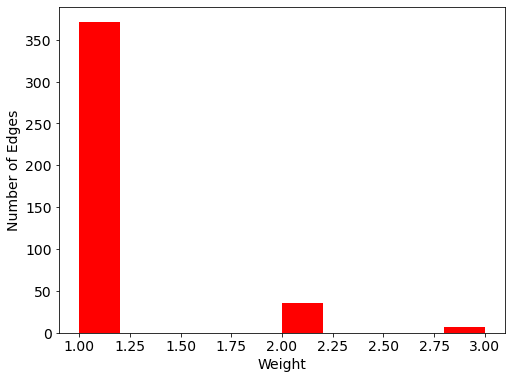

In [22]:
ax = df.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="red")
ax.set_ylabel("Number of Edges", fontsize=14)
ax.set_xlabel("Weight", fontsize=14);

Shown by the histogram above is the distribution of edge weights. We can see, that most actors in dataset2 appear in one movies together and everything outside of that is an outlier. The range however is between 1 and 3 which is a smaller range than in dataset2.

Next remove the isolated nodes

In [23]:
#first i wish to see a list of the isolated nodes.
list(nx.isolates(g2))

['Cleo King',
 'Son Ye-jin',
 'Lola Dueñas',
 'Rod Steiger',
 'Peter Cushing',
 'Megan Fox',
 'Liam Cunningham',
 'Taraneh Alidoosti',
 'John Goodman',
 'Jason Isaacs',
 'Gracy Singh',
 'James Nesbitt',
 'Gerard McSorley',
 'Juliane Köhler',
 'Maximilian Schell',
 'Hiam Abbass',
 'Cliff Robertson',
 'Julia Jentsch',
 'Stuart Townsend',
 "Jason O'Mara",
 'Dev Patel',
 'Leonor Watling',
 'Betty White',
 'Soha Ali Khan',
 'Liza Minnelli',
 'Sidney Poitier',
 'Rupert Grint',
 'Art Carney',
 'Louise Fletcher',
 'Ryôko Hirosue',
 'Terry Crews',
 'Elaine Kao']

There are more isolated nodes that in dataset1.

In [24]:
g2.remove_nodes_from(list(nx.isolates(g2)))

In [25]:
list(nx.isolates(g2))

[]

Again the list is empty as all isolated nodes have been removed

## Task 2: Network characterisation for g1

In [26]:
g1.number_of_nodes()

169

In [27]:
g1.number_of_edges()

471

In [28]:
nx.density(g1)

0.03317836010143702

The density being 0.03 means that of all possible edges between nodes only 3% are actually present.

In [29]:
#check if the network is connected
nx.is_connected(g1)

False

In [30]:
nx.number_connected_components(g1)

3

As the network1 is not connected I can not check the diameter of the network. However I can investigate if paths are present between two nodes.

In [31]:
#check if there is a path between two actors
nx.has_path(g1, "Steve Buscemi", "Ciaran Owens")

True

In [32]:
#check the length of the shortes path
nx.shortest_path_length(g1, "Steve Buscemi", "Ciaran Owens")

5

In [33]:
#list that path
nx.shortest_path(g1, "Steve Buscemi", "Ciaran Owens")

['Steve Buscemi',
 'Tilda Swinton',
 'Saoirse Ronan',
 'Emma Watson',
 'Devon Murray',
 'Ciaran Owens']

In [34]:
# display the nodes in each component
for component in nx.connected_components(g1):
    print(component)

{'Jim Carrey', 'Jack Black', 'Katherine Heigl', 'Woody Harrelson', 'Helena Bonham Carter', 'Emma Thompson', 'Kurt Russell', 'Emily Watson', 'Colin Firth', 'Mary Elizabeth Winstead', 'Julia Roberts', 'Alexandra Maria Lara', 'Birgit Minichmayr', 'Eddie Murphy', 'Oscar Isaac', "Vincent D'Onofrio", 'Al Pacino', 'Geoffrey Rush', 'Vincent Cassel', 'Kali Hawk', 'Frank Grillo', 'Goldie Hawn', 'James Phelps', 'Mark Ruffalo', 'Alec Guinness', 'Chloë Grace Moretz', 'Matt Lucas', 'Adrien Brody', 'Colin Farrell', 'Anna Faris', 'Drew Barrymore', 'Rebel Wilson', 'Jena Malone', 'Danny Trejo', 'Danny DeVito', 'Leonardo DiCaprio', 'Viola Davis', 'Melissa McCarthy', 'Cameron Diaz', 'Angela Bassett', 'Vera Farmiga', 'Gwyneth Paltrow', 'Timothée Chalamet', 'Jennifer Jason Leigh', 'Olivia Colman', 'Mindy Kaling', 'Paul Giamatti', 'Daisy Ridley', 'Carrie Fisher', 'Joaquin Phoenix', 'Charlton Heston', 'Liam Neeson', 'Marisa Tomei', 'Steve Buscemi', 'Seth Rogen', 'Will Ferrell', 'Ciaran Owens', 'Mahershala Ali

From the three components has listed above there are two pairs that are not connected to the main group. This can be seen in the graph below.

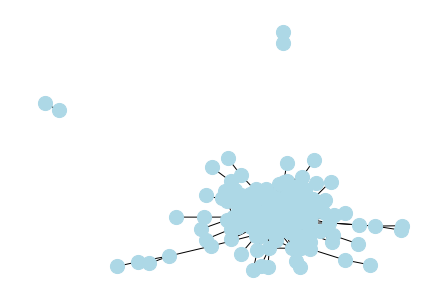

In [35]:
nx.draw( g1, node_size=200, node_color="lightblue" )

In [36]:
#lets create a subgraph of these pairs.
required = ["Faye Dunaway", "Carrie-Anne Moss", "Chris Tucker", "Marlon Brando"]
sg = nx.subgraph( g1, required )

In [37]:
sg.number_of_nodes(), sg.number_of_edges()

(4, 2)

In [38]:
nx.density(g1), nx.density(sg)

(0.03317836010143702, 0.3333333333333333)

The density of the subgraph is much higher than the density of the whole network.

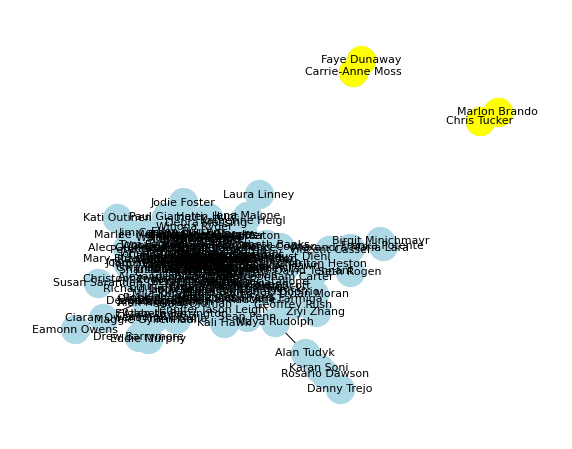

In [39]:
#draw the whole network but colour the subgraph a different colour.
plt.figure(figsize=(10,8))
plt.margins(0.1, 0.1)
# determine node positions
pos = nx.spring_layout(g1)
# draw the full network
nx.draw_networkx(g1, pos, with_labels=True, font_size=11, node_size=800, node_color="lightblue")
# draw the subgraph set of nodes
nx.draw_networkx_nodes(g1, pos, nodelist=required, node_size=800, node_color="yellow")
plt.axis("off")
plt.show()

In [40]:
# get a dictionary of degree scores for all nodes, using values from the 'weight' attribute
# this will enable me to see which nodes are important.
degreesG1 = dict(g1.degree(weight="weight"))

In [41]:
#check the range, the mean and the median.
degG1 = pd.Series(degreesG1)
print('Weighted degree range: [%d, %d]' % (degG1.min(), degG1.max() ) )
print('Mean weighted degree: %.2f' % degG1.mean() )
print('Median weighted degree: %d' % degG1.median() )

Weighted degree range: [1, 25]
Mean weighted degree: 6.45
Median weighted degree: 5


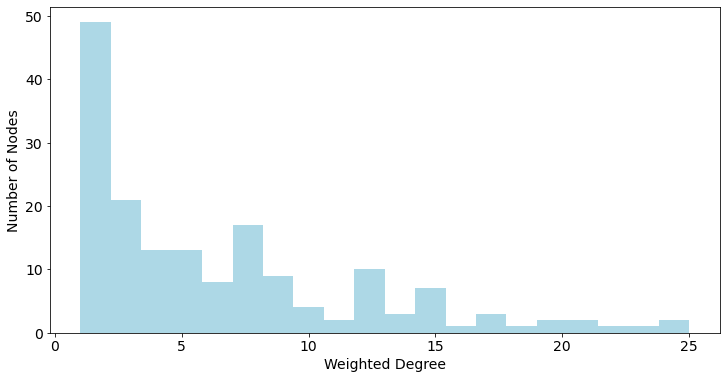

In [42]:
ax = degG1.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="lightblue", bins=20, zorder=3)
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Weighted Degree", fontsize=14);

The majority of nodes have a degree of 1. There is outliers in the twenties. These are obviously important nodes which are directly connected to many nodes.

In [43]:
degG1.sort_values(ascending=False).head(10)

Adam Driver          25
Chris Evans          24
Timothée Chalamet    23
Oliver Phelps        22
Mark Ruffalo         21
Benicio Del Toro     21
Meryl Streep         19
James Phelps         19
Daisy Ridley         18
Devon Murray         17
dtype: int64

The individual with 25 is Adam Driver.

In [44]:
#next check the eigenvector centrality.
eigsG1 = dict(nx.eigenvector_centrality(g1, weight="weight"))
# convert dictionary to a Series
eigG1 = pd.Series(eigsG1)
# get top 20
eigG1.sort_values(ascending=False).head(20)

Oliver Phelps           0.528032
James Phelps            0.479871
Devon Murray            0.416269
Emma Watson             0.293897
Alan Rickman            0.278533
Robbie Coltrane         0.221072
Richard Griffiths       0.203843
Maggie Smith            0.161768
Elizabeth Berrington    0.069779
Timothée Chalamet       0.065673
Meryl Streep            0.056671
Saoirse Ronan           0.056558
Laura Dern              0.046880
Julie Walters           0.043558
Chris Evans             0.037461
Benicio Del Toro        0.034886
Adam Driver             0.030003
Ciaran Owens            0.028807
Mark Ruffalo            0.027476
Jason Segel             0.025163
dtype: float64

Oliver Phelps is has the highest eigenvector centrality score. This means that he is connected to many important nodes. Intrestingly Adam Driver is a lot lower on this score compared to degree. This means that he is the important node that people are connected to. Although he himself is connected to less important nodes.

Betweenness centrality can be used to find bridging nodes in a network.
Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score.

In [45]:
betsG1 = dict(nx.betweenness_centrality(g1, weight="weight"))
# convert dictionary to a Series
betG1 = pd.Series(betsG1)
# get top 20
betG1.sort_values(ascending=False).head(20)

Adam Driver          0.086826
Benicio Del Toro     0.079513
Meryl Streep         0.068612
Maggie Smith         0.068042
Emma Watson          0.067167
Timothée Chalamet    0.064010
Bill Murray          0.061004
David Thewlis        0.056545
Andy Serkis          0.051918
Olivia Colman        0.051700
Barry Keoghan        0.051578
Maya Rudolph         0.047525
Jennifer Lawrence    0.047262
August Diehl         0.046436
Colin Firth          0.045854
Matt Damon           0.042714
Justin Theroux       0.041548
Toni Collette        0.040945
Jon Bernthal         0.039263
Stellan Skarsgård    0.039194
dtype: float64

Driver once again proving to be an important node with the highest betweeness score. He must appear on the most shortest length paths.

In [46]:
#next check the closeness centrality, in this nodes with the highest score have the shortest distance to other nodes.
closeG1 = nx.closeness_centrality(g1)
closeG1

{'Steve Buscemi': 0.30436357052326635,
 'Ciaran Owens': 0.20982337889284153,
 'Christopher Walken': 0.2690676270508203,
 'Drew Barrymore': 0.20239600264884713,
 'John Lithgow': 0.27273464752170035,
 'Gwendoline Christie': 0.318914816922785,
 'Jon Bernthal': 0.2964726631393298,
 'Abigail Breslin': 0.2858843537414966,
 'Danny Trejo': 0.13718529399763332,
 'Rosario Dawson': 0.1594574084613925,
 'Oliver Phelps': 0.2677177894569199,
 'Sharlto Copley': 0.24442021083242457,
 'Ben Stiller': 0.279398321283138,
 'Daniel Radcliffe': 0.24975856177104225,
 'Tina Fey': 0.2948346926247479,
 'Alexandra Maria Lara': 0.21518177163338453,
 'Seth Rogen': 0.19058956916099773,
 'Julie Walters': 0.3221232154833764,
 'Bette Midler': 0.2659389337130201,
 'Susan Sarandon': 0.21120743812036688,
 'Ian Hart': 0.28037694937870067,
 'Oscar Isaac': 0.33918482647296205,
 'Tilda Swinton': 0.32277265745007677,
 'Kurt Russell': 0.2853747559629913,
 'Bill Murray': 0.3413544522286526,
 'Sean Penn': 0.22297386921342352,
 'M

In [47]:
#next I will create a dataframe to see these scores together.
s = pd.Series(degG1)
dfG1 = pd.DataFrame(s,columns=["degree_centrality"])
dfG1["betweenness"] = pd.Series(betG1)
dfG1["closeness"] = pd.Series(closeG1)
dfG1["eigenvector"] = pd.Series(eigG1)
dfG1.sort_values(by="degree_centrality",ascending=False).head(10)


,degree_centrality,betweenness,closeness,eigenvector
Adam Driver,25,0.086826,0.378476,0.030003
Chris Evans,24,0.035867,0.355767,0.037461
Timothée Chalamet,23,0.064010,0.384844,0.065673
Oliver Phelps,22,0.002410,0.267718,0.528032
Mark Ruffalo,21,0.033042,0.334927,0.027476
Benicio Del Toro,21,0.079513,0.366351,0.034886
Meryl Streep,19,0.068612,0.383003,0.056671
James Phelps,19,0.004763,0.267718,0.479871
Daisy Ridley,18,0.027960,0.344291,0.023453
Devon Murray,17,0.023097,0.265939,0.416269


It is clear that Adam Driver is the most important node. He has the highest degree and betweeness.

## Task 2: Characterisation of g2

In [48]:
g2.number_of_nodes()

180

In [49]:
g2.number_of_edges()

413

In [50]:
nx.density(g2)

0.02563625077591558

Only around 2.5% of all available edges are present.

In [51]:
nx.has_path(g2, "George C. Scott", "Demi Moore")

False

There is no path between Scott and Moore

In [52]:
nx.has_path(g2, "George C. Scott", "Rex Harrison")

True

In [53]:
nx.shortest_path_length(g2, "George C. Scott", "Rex Harrison")

1

In [54]:
nx.shortest_path(g2, "George C. Scott", "Rex Harrison")

['George C. Scott', 'Rex Harrison']

Scott and Harrison are directly connected.

In [55]:
nx.shortest_path_length(g2, "Elizabeth Olsen", "John Boyega")

4

In [56]:
nx.shortest_path(g2, "Elizabeth Olsen", "John Boyega")

['Elizabeth Olsen',
 'Scarlett Johansson',
 'Ben Mendelsohn',
 'Samuel L. Jackson',
 'John Boyega']

In [57]:
nx.is_connected(g2)

False

In [58]:
nx.number_connected_components(g2)

4

Network g2 is not connected and has four components.

In [59]:
# display the nodes in each component
for component in nx.connected_components(g2):
    print(component)

{'Katharine Hepburn', 'Geraldine Page', 'George C. Scott', 'José Ferrer', 'Henry Fonda', 'Rex Harrison', 'Gregory Peck', 'David Niven', 'Ray Milland', 'William Holden'}
{'Jeff Bridges', 'Hugh Jackman', 'Paul Scofield', 'James Gandolfini', 'Jennifer Connelly', 'F. Murray Abraham', 'Liv Tyler', 'Helen Mirren', 'Ciarán Hinds', 'Amy Ryan', 'Jonathan Pryce', 'Jane Fonda', 'Jennifer Hudson', 'Ben Kingsley', 'Aidan Gillen', 'Scarlett Johansson', 'Michael Gambon', 'Mark Williams', 'Sissy Spacek', 'Mark Hamill', 'Kerry Condon', 'Christopher Meloni', 'Billy Bob Thornton', 'Sharon Stone', 'Kate McKinnon', 'Brian Cox', 'Jon Voight', 'Ewan McGregor', 'Naomi Watts', 'Willem Dafoe', 'Michael Cera', 'Ansel Elgort', 'Michelle Williams', 'Cate Blanchett', 'Owen Wilson', 'Chris Rock', 'Sally Field', 'Julie Delpy', 'Jessica Lange', 'Daniel Day-Lewis', 'Brian Caspe', 'Hugo Weaving', 'Richard Dreyfuss', 'Holly Hunter', 'Brad Pitt', 'Marion Cotillard', 'Robert Duvall', 'Domhnall Gleeson', 'Audrey Tautou', 'A

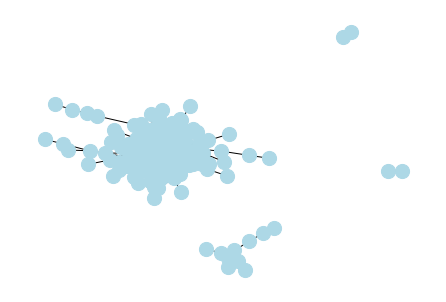

In [60]:
nx.draw( g2, node_size=200, node_color="lightblue" )

Compared to g1, g2 has a subnetwork which is larger than the pairs seen in g1

In [61]:
required = ["William Holden", "Henry Fonda", "Ray Milland", "Katharine Hepburn", "José Ferrer", "David Niven", "Geraldine Page", "Gregory Peck", "Rex Harrison", "George C. Scott"]
sg = nx.subgraph( g2, required )

In [62]:
sg.number_of_nodes(), sg.number_of_edges()

(10, 11)

In [63]:
nx.density(g2), nx.density(sg)

(0.02563625077591558, 0.24444444444444444)

The subgraph has a much higher density.

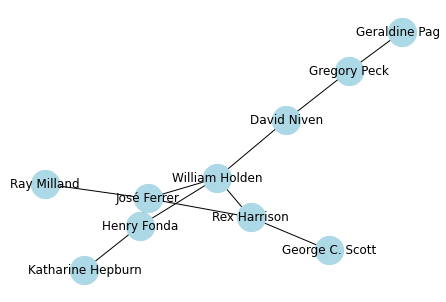

In [64]:
nx.draw( sg, with_labels=True, node_size=800, node_color="lightblue" )

In [65]:
# get a dictionary of degree scores for all nodes, using values from the 'weight' attribute
degreesG2 = dict(g2.degree(weight="weight"))

In [66]:
#get the range weight and mean
degG2 = pd.Series(degreesG2)
print('Weighted degree range: [%d, %d]' % (degG2.min(), degG2.max() ) )
print('Mean weighted degree: %.2f' % degG2.mean() )
print('Median weighted degree: %d' % degG2.median() )

Weighted degree range: [1, 21]
Mean weighted degree: 5.13
Median weighted degree: 4


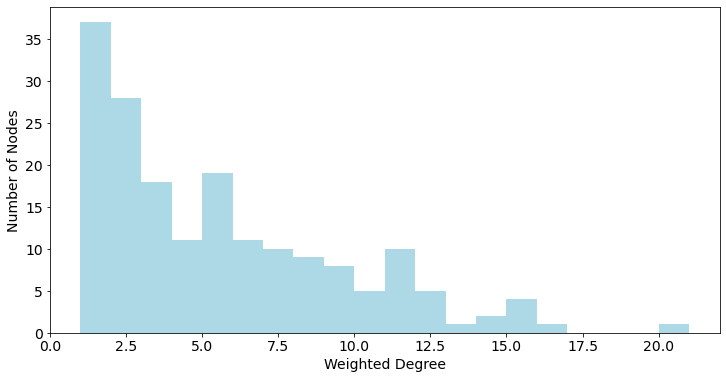

In [67]:
ax = degG2.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="lightblue", bins=20, zorder=3)
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Weighted Degree", fontsize=14);

In [68]:
degG2.sort_values(ascending=False).head(10)

Scarlett Johansson    21
Kelly Marie Tran      16
Josh Brolin           15
Domhnall Gleeson      15
Lupita Nyong'o        15
Willem Dafoe          15
Samuel L. Jackson     14
John Boyega           14
Edward Norton         13
Ewan McGregor         12
dtype: int64

Compared to g1 there are fewer nodes with a degree above 20. Scarlett Johansson is well ahead of the net most important node in this field.

In [69]:
eigsG2 = dict(nx.eigenvector_centrality(g2, weight="weight"))
# convert dictionary to a Series
eigG2 = pd.Series(eigsG2)
# get top 20
eigG2.sort_values(ascending=False).head(20)

Kelly Marie Tran      0.396409
Domhnall Gleeson      0.392467
John Boyega           0.388384
Lupita Nyong'o        0.370108
Mark Hamill           0.350707
Billy Dee Williams    0.254237
Ewan McGregor         0.244417
Samuel L. Jackson     0.240091
Emma Stone            0.101147
Cate Blanchett        0.093674
Leslie Mann           0.076721
Christoph Waltz       0.067392
Steve Carell          0.064360
Ron Perlman           0.059834
Penélope Cruz         0.059778
Nicolas Cage          0.057700
Diane Kruger          0.056681
Willem Dafoe          0.055708
Scarlett Johansson    0.052859
Edward Norton         0.049619
dtype: float64

In [70]:
betsG2 = dict(nx.betweenness_centrality(g2, weight="weight"))
# convert dictionary to a Series
betG2 = pd.Series(betsG2)
# get top 20
betG2.sort_values(ascending=False).head(20)

Patricia Clarkson     0.070033
Amy Adams             0.065303
Willem Dafoe          0.058289
Samuel L. Jackson     0.058265
Steve Carell          0.055092
Laurence Fishburne    0.052019
Luke Wilson           0.051931
Scarlett Johansson    0.049961
Leslie Mann           0.049715
Jeff Bridges          0.047718
Emma Stone            0.046742
Halle Berry           0.044137
Jennifer Hudson       0.043837
Brad Pitt             0.043565
Keira Knightley       0.042766
Marion Cotillard      0.042336
Judi Dench            0.042267
Michael Gambon        0.041537
Rachel Weisz          0.041253
Julie Christie        0.040424
dtype: float64

In [71]:
closeG2 = nx.closeness_centrality(g2)
closeG2

{'George C. Scott': 0.01675977653631285,
 'Samuel L. Jackson': 0.30788455884016014,
 'Gene Hackman': 0.00558659217877095,
 'Jennifer Coolidge': 0.2191570202695088,
 'J.K. Simmons': 0.2654362514258972,
 'Paul Scofield': 0.15332154442241844,
 'Naomi Watts': 0.26359613876436583,
 'Martin McCann': 0.24571077878358497,
 'Jean-Claude Van Damme': 0.23653961441219146,
 'Owen Wilson': 0.2659003008165019,
 'Christopher Meloni': 0.22139006123295357,
 'Christoph Waltz': 0.302978032006054,
 'Jean Dujardin': 0.22366907656917515,
 'Michelle Williams': 0.27306099114369675,
 'Frances McDormand': 0.3017757382282522,
 'Mark Hamill': 0.2663659755990177,
 'Ansel Elgort': 0.24142059058260176,
 'Martin Lawrence': 0.23989743228239604,
 'Idris Elba': 0.2853564203884411,
 'Ron Perlman': 0.27063162289508735,
 'Sharon Stone': 0.21947326416600157,
 'Keira Knightley': 0.3103979021776308,
 'Pierce Brosnan': 0.214823406874349,
 'Jack Nicholson': 0.12128785651279035,
 'Michael Gambon': 0.30058294874908914,
 'Geena Dav

In [148]:
sG2 = pd.Series(degG2)
dfG2 = pd.DataFrame(sG2,columns=["degree_centrality"])
dfG2["betweenness"] = pd.Series(betG2)
dfG2["closeness"] = pd.Series(closeG2)
dfG2["eigenvector"] = pd.Series(eigG2)
dfG2.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector
Scarlett Johansson,21,0.049961,0.321554,0.052859
Kelly Marie Tran,16,0.003753,0.286972,0.396409
Josh Brolin,15,0.039356,0.302978,0.035267
Domhnall Gleeson,15,0.017726,0.289154,0.392467
Lupita Nyong'o,15,0.014350,0.291929,0.370108
Willem Dafoe,15,0.058289,0.316865,0.055708
Samuel L. Jackson,14,0.058265,0.307885,0.240091
John Boyega,14,0.006361,0.278562,0.388384
Edward Norton,13,0.016443,0.316865,0.049619
Ewan McGregor,12,0.032034,0.293054,0.244417


Johansson is the most important node in terms of centrality. She is number two in closeness. However she is not the highest in the other 2 fields. 

## Task 2: In Comparison

In [73]:
g1.number_of_nodes(), g1.number_of_edges()

(169, 471)

In [74]:
g2.number_of_nodes(), g2.number_of_edges()

(180, 413)

g2 has more nodes but less edges. This means that the density is lower and that the actor's in the dataset tend to share the screen less often than in g1.

In [75]:
nx.density(g1),nx.density(g2)

(0.03317836010143702, 0.02563625077591558)

Network g1 has the higher density, meaning a higher percentage of available edges are present, however both are low.

In [76]:
nx.is_connected(g1),nx.is_connected(g2)

(False, False)

Neither network is connected. This means the diameter of neither can be explored

In [77]:
nx.number_connected_components(g1),nx.number_connected_components(g2)

(3, 4)

Network g2 has one more component that network g1

In [78]:
print('Weighted degree range of g1: [%d, %d]' % (degG1.min(), degG1.max() ) )
print('Mean weighted degree of g1: %.2f' % degG1.mean() )
print('Median weighted degree of g1: %d' % degG1.median() )
print('Weighted degree range of g2: [%d, %d]' % (degG2.min(), degG2.max() ) )
print('Mean weighted degree of g2: %.2f' % degG2.mean() )
print('Median weighted degree of g2: %d' % degG2.median() )

Weighted degree range of g1: [1, 25]
Mean weighted degree of g1: 6.45
Median weighted degree of g1: 5
Weighted degree range of g2: [1, 21]
Mean weighted degree of g2: 5.13
Median weighted degree of g2: 4


The degree score of all values is higher for g1. The range is four higher which is to be expected as Adam Driver had a much higher degree compared to Johansson. The average is significantly brought up as there where more values above 16 for network g1 where as Johansson was the only actor with agree above 16 in g2.

In [79]:
degG2.sort_values(ascending=False).head(5), degG1.sort_values(ascending=False).head(5), 

(Scarlett Johansson    21
 Kelly Marie Tran      16
 Josh Brolin           15
 Domhnall Gleeson      15
 Lupita Nyong'o        15
 dtype: int64,
 Adam Driver          25
 Chris Evans          24
 Timothée Chalamet    23
 Oliver Phelps        22
 Mark Ruffalo         21
 dtype: int64)

As mentioned above the degree's of the top 5 of g1 are all higher than in g2. This shows that these nodes are more connected with in there network than any one in g2.

In [80]:
eigG1.sort_values(ascending=False).head(5), eigG2.sort_values(ascending=False).head(5)

(Oliver Phelps    0.528032
 James Phelps     0.479871
 Devon Murray     0.416269
 Emma Watson      0.293897
 Alan Rickman     0.278533
 dtype: float64,
 Kelly Marie Tran    0.396409
 Domhnall Gleeson    0.392467
 John Boyega         0.388384
 Lupita Nyong'o      0.370108
 Mark Hamill         0.350707
 dtype: float64)

Again the nodes in g1 have a bigger max value in regards to eigenvector centrality. Although the scores in g1 decrease quicker. This could mean that the nodes in g1 are connected to more less important nodes that those in g2. 

In [81]:
betG1.sort_values(ascending=False).head(5), betG2.sort_values(ascending=False).head(5)

(Adam Driver         0.086826
 Benicio Del Toro    0.079513
 Meryl Streep        0.068612
 Maggie Smith        0.068042
 Emma Watson         0.067167
 dtype: float64,
 Patricia Clarkson    0.070033
 Amy Adams            0.065303
 Willem Dafoe         0.058289
 Samuel L. Jackson    0.058265
 Steve Carell         0.055092
 dtype: float64)

The most important nodes in g1 have a higher betweeness score compared to g1. They appear in more shortest paths than there counterparts in g2.

The network for dataset1, g1, has nodes that appear more important to the structure of their network. The have a higher degree meaning that the are connected to more nodes than those in g2. This is seen as g1 has a lower number of nodes but a higher number of edges. This becomes clearer when comparing densities. g1's is 0.033 compared to 0.025 for g2. These are both stll low. Both networks are not connected. They are similar in this aspect. Still it is clear when comparing the centrality measures of g1 and g2, nodes in g1 tend to have a higher score. The betweeness is higher suggesting that the important nodes appear in more shortest paths. The eigenvector values for Phelps in g1 is the highest but the eigenvector centrality score of nodes in g1 decreases quicker than in g2. This could mean that nodes in g1 are connected to more less important nodes than in g1.

## Task 3 : Thresholding

## Network 1 

First i will print the number of nodes and edges of g1 before applying any thresholding.

In [82]:
print("Network has %d nodes and %d edges" % ( g1.number_of_nodes(), g1.number_of_edges() ) )

Network has 169 nodes and 471 edges


In [83]:
G1th2 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g1.edges(data=True):
    #apply a threshold of weight 2
    if data["weight"] >= 2:
        G1th2.add_edge( node1, node2 )

In [84]:
print("Network has %d nodes and %d edges" % ( G1th2.number_of_nodes(), G1th2.number_of_edges() ) )

Network has 53 nodes and 56 edges


The number of nodes and edges hve massively decreased! This means that the majority of actors were only starring in movies with another actor once.

In [85]:
nx.number_connected_components(G1th2)

13

The number of components after applying a threshold of 2 has massively increased.

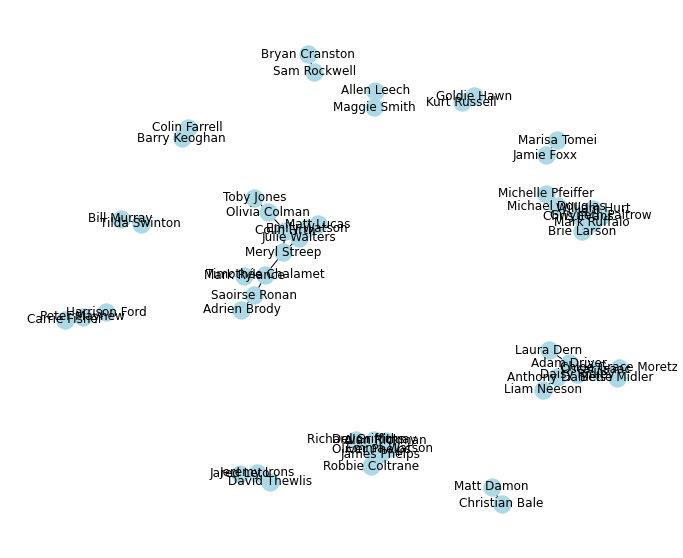

In [86]:
# draw a simple network diagram of the full network
plt.figure(figsize=(12,10))
nx.draw_networkx( G1th2, with_labels=True, node_size=300, node_color="lightblue" )
plt.axis("off")
plt.show()

This diagram gives a clear picture that a large number of nodes that were linking parts of the network together has been removed due to thresholding of 2

In [87]:
G1th3 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g1.edges(data=True):
    if data["weight"] >= 3:
        G1th3.add_edge( node1, node2 )

In [88]:
print("Network has %d nodes and %d edges" % ( G1th3.number_of_nodes(), G1th3.number_of_edges() ) )

Network has 16 nodes and 11 edges


The number of nodes and edges have once again decreased due to a threshold of 3.

In [89]:
nx.number_connected_components(G1th3)

6

The number of components has also decreased.

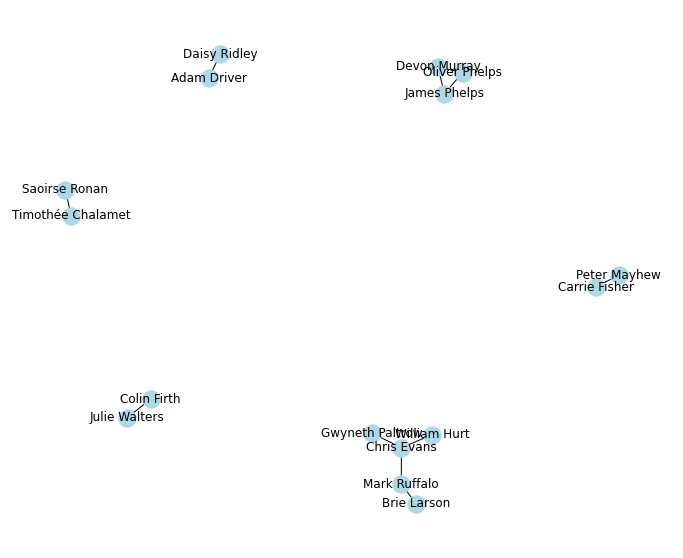

In [90]:
# draw a simple network diagram of the full network
plt.figure(figsize=(12,10))
nx.draw_networkx( G1th3, with_labels=True, node_size=300, node_color="lightblue" )
plt.axis("off")
plt.show()

In [91]:
G1th4 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g1.edges(data=True):
    if data["weight"] >= 4:
        G1th4.add_edge( node1, node2 )

In [92]:
print("Network has %d nodes and %d edges" % ( G1th4.number_of_nodes(), G1th4.number_of_edges() ) )

Network has 5 nodes and 3 edges


In [93]:
nx.number_connected_components(G1th4)

2

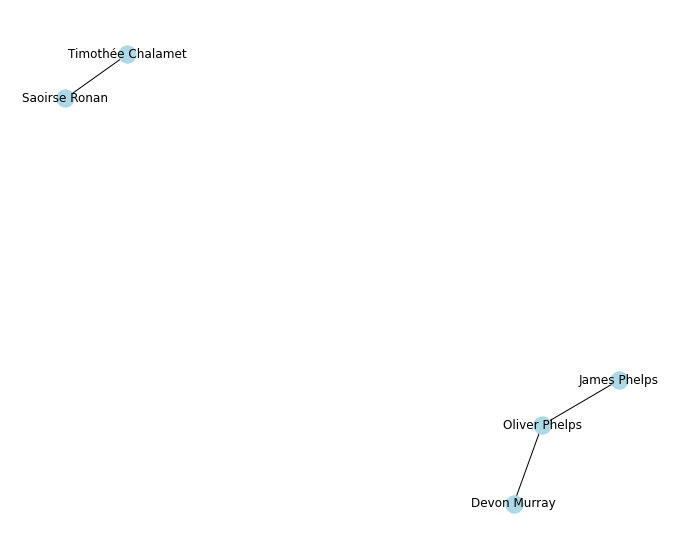

In [94]:
# draw a simple network diagram of the full network
plt.figure(figsize=(12,10))
nx.draw_networkx( G1th4, with_labels=True, node_size=300, node_color="lightblue" )
plt.axis("off")
plt.show()

In [95]:
G1th5 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g1.edges(data=True):
    if data["weight"] >= 5:
        G1th5.add_edge( node1, node2 )

In [96]:
print("Network has %d nodes and %d edges" % ( G1th5.number_of_nodes(), G1th5.number_of_edges() ) )

Network has 3 nodes and 2 edges


In [97]:
nx.number_connected_components(G1th5)

1

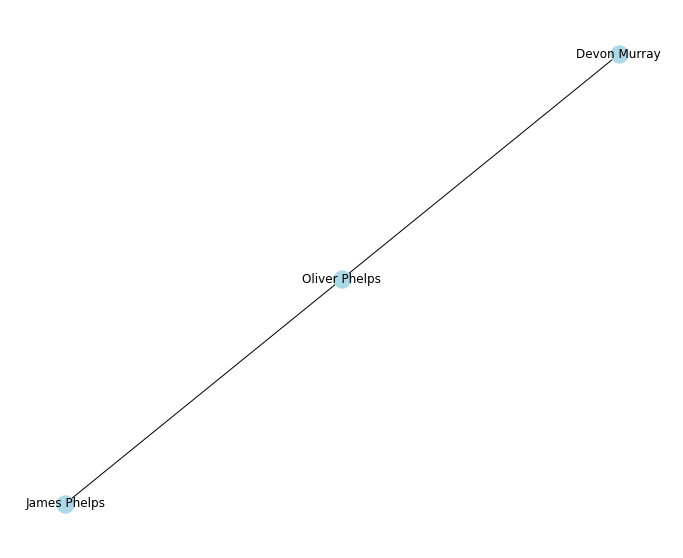

In [98]:
# draw a simple network diagram of the full network
plt.figure(figsize=(12,10))
nx.draw_networkx( G1th5, with_labels=True, node_size=300, node_color="lightblue" )
plt.axis("off")
plt.show()

The subgraph of Saoirse Ronan and Timothee has disappeared due the increase of the threshold. The network only has one component now.

In [99]:
G1th6 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g1.edges(data=True):
    if data["weight"] >= 6:
        G1th6.add_edge( node1, node2 )

In [100]:
print("Network has %d nodes and %d edges" % ( G1th6.number_of_nodes(), G1th6.number_of_edges() ) )

Network has 2 nodes and 1 edges


In [101]:
nx.number_connected_components(G1th6)

1

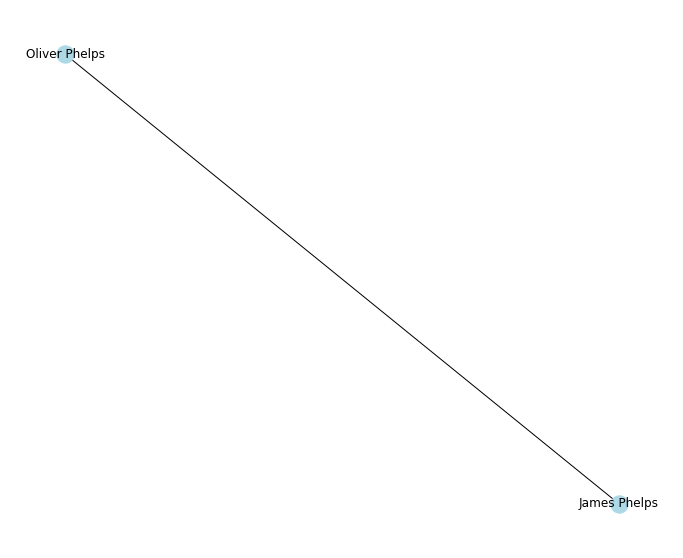

In [102]:
# draw a simple network diagram of the full network
plt.figure(figsize=(12,10))
nx.draw_networkx( G1th6, with_labels=True, node_size=300, node_color="lightblue" )
plt.axis("off")
plt.show()

And finally there are only two nodes left as to be expected as we saw in the tables earlier that these two were the actors that shared the screen the most with a score of 7. Increasing the weight to 8 would lead to an empty graph.

## Network 2

In [103]:
print("Network has %d nodes and %d edges" % ( g2.number_of_nodes(), g2.number_of_edges() ) )

Network has 180 nodes and 413 edges


In [104]:
G2th2 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g2.edges(data=True):
    if data["weight"] >= 2:
        G2th2.add_edge( node1, node2 )

In [105]:
print("Network has %d nodes and %d edges" % ( G2th2.number_of_nodes(), G2th2.number_of_edges() ) )

Network has 48 nodes and 42 edges


As expected when adding a thresehold of 2 to the weight the number of nodes and edges drop. Nodes from 180 -> 48. Edges from 413 -> 42.

In [106]:
nx.number_connected_components(G2th2)

17

The number of components have decreased due to removing nodes which would have linked the components together thus removing them the number of components has increased.

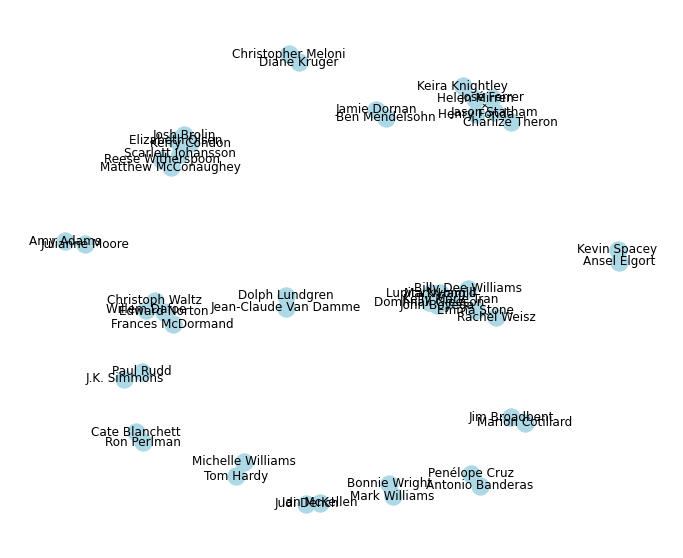

In [107]:
# draw a simple network diagram of the full network
plt.figure(figsize=(12,10))
nx.draw_networkx( G2th2, with_labels=True, node_size=300, node_color="lightblue" )
plt.axis("off")
plt.show()

The drop in nodes and edges can be clearly seen in the above graph. The increase in components is also clear.

In [108]:
G2th3 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g2.edges(data=True):
    #now create the weight threshold to 3
    if data["weight"] >= 3:
        G2th3.add_edge( node1, node2 )

In [109]:
print("Network has %d nodes and %d edges" % ( G2th3.number_of_nodes(), G2th3.number_of_edges() ) )

Network has 11 nodes and 7 edges


The nodes and edges have again decreased.

In [110]:
nx.number_connected_components(G2th3)

5

The number of components have decreased as many of the smaller components with a weight of 2 have been removed.

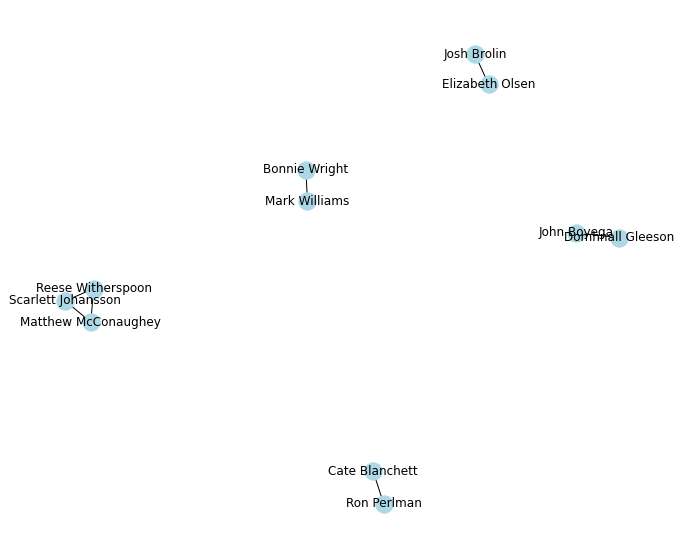

In [111]:
# draw a simple network diagram of the full network
plt.figure(figsize=(12,10))
nx.draw_networkx( G2th3, with_labels=True, node_size=300, node_color="lightblue" )
plt.axis("off")
plt.show()

All but one of the components have only two actors.

In [112]:
G2th4 = nx.Graph()
# iterate over the edges in the original network
for node1, node2, data in g2.edges(data=True):
    #now create the weight threshold to 4
    if data["weight"] >= 4:
        G2th4.add_edge( node1, node2 )

In [113]:
print("Network has %d nodes and %d edges" % ( G2th4.number_of_nodes(), G2th4.number_of_edges() ) )

Network has 0 nodes and 0 edges


In [114]:
nx.number_connected_components(G2th4)

0

Upon increasing the threshold to 4 there are no nodes or edges left. Compared to network one where James and Oliver Phelps appeared in 7 movies together, the actors in network 2 don't consistantly appear in the same movies together. 

## Task 4: Ego Centric Analysis 

For task 3 I must create an ego-centric network based on an important node found in task 2(b). For network 1, I have chosen Adam Driver. I chose him as he is a very important node. He tops the list in centrality, betweeness and comes in third place in closeness. This makes him a very important node in network 1.

In [115]:
#i will create a function which allows an ego-centric network to be displayed
def display_ego(g, ego_node):
    # build the ego network
    eg = nx.ego_graph(g, ego_node)
    # create the figure
    plt.figure(figsize=(9,7))
    plt.margins(0.1, 0.1)
    title = "Ego network for %s (%d nodes)" % (ego_node, eg.number_of_nodes())
    plt.title(title, fontsize=14)
    # lay out all nodes
    pos = nx.spring_layout(g)
    # draw the full network
    nx.draw_networkx(eg, pos, with_labels=True, font_size=12, node_size=900, node_color="lightblue")
    # draw the ego in red, with larger node size
    nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], node_size=2500, node_color="coral")
    plt.axis("off")

### Network 1

In [116]:
#now I will print all of the egos nodes neighbours.
#i will make Adam Driver the ego node as he appears in the top 3 of 3 of the centrality measures above.
ego_node = "Adam Driver"
alters = g1.neighbors(ego_node)
for node in alters:
    print(node)

Steve Buscemi
Gwendoline Christie
Oscar Isaac
Tilda Swinton
Bill Murray
Carrie Fisher
Jared Leto
Hilary Swank
Justin Theroux
Laura Dern
Jeremy Irons
Daisy Ridley
Anthony Daniels
Liam Neeson
Harrison Ford
Al Pacino
Benicio Del Toro
Michael McElhatton
Andy Serkis
Matt Damon


In [117]:
#now create the ego network
egG1 = nx.ego_graph(g1, ego_node)

In [118]:
#list all the nodes in the network to make sure its the same as seen before for the neighbours
list(egG1.nodes())

['Laura Dern',
 'Michael McElhatton',
 'Daisy Ridley',
 'Carrie Fisher',
 'Liam Neeson',
 'Oscar Isaac',
 'Adam Driver',
 'Al Pacino',
 'Steve Buscemi',
 'Benicio Del Toro',
 'Hilary Swank',
 'Matt Damon',
 'Jeremy Irons',
 'Anthony Daniels',
 'Tilda Swinton',
 'Bill Murray',
 'Harrison Ford',
 'Jared Leto',
 'Gwendoline Christie',
 'Andy Serkis',
 'Justin Theroux']

In [119]:
#next print the density of network
nx.density(egG1)

0.3380952380952381

The density of 0.33 means only 33% of all possible edges are present. This means that Adam Driver's neighbours are connecting through him and not which each other.

In [120]:
nx.is_connected(egG1)

True

The network is connected as all nodes go back to a central ego node.

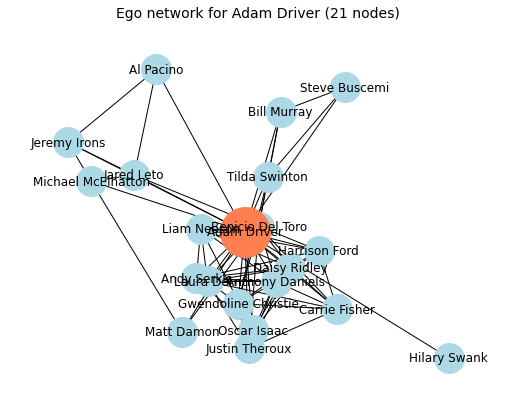

In [121]:
#display the network for Adam Driver using the function created previously.
display_ego(g1, "Adam Driver")

From the above network it is clear that removing Adam Driver will have a big impact on the network as it will leave Hilary Swank isolated. I will check this by removing the ego node.

In [122]:
# create the full ego network
ego_node = "Adam Driver"
egSG = nx.ego_graph(g1, ego_node)
# now remove the ego
egSG.remove_node(ego_node)

In [123]:
#check the density of this new graph.
nx.density(egSG)

0.26842105263157895

The density drops as removing Adam Driver will isolate a node. All other nodes link back to him and this is no longer the case.

In [124]:
#check if the network is no longer connected as a result of removing Driver.
nx.is_connected(egSG)

False

Unsurprisingly after viewing the graph above removing Adam Driver means the network is no longer connected.

In [125]:
#Check the number of components
nx.number_connected_components(egSG)

2

In [126]:
#see if  Hilary Swank is isolated
list(nx.isolates(egSG))

['Hilary Swank']

She is.

In [127]:
# display the nodes in each component
for component in nx.connected_components(egSG):
    print(component)

{'Laura Dern', 'Michael McElhatton', 'Daisy Ridley', 'Carrie Fisher', 'Liam Neeson', 'Oscar Isaac', 'Al Pacino', 'Steve Buscemi', 'Benicio Del Toro', 'Matt Damon', 'Jeremy Irons', 'Anthony Daniels', 'Tilda Swinton', 'Bill Murray', 'Harrison Ford', 'Jared Leto', 'Gwendoline Christie', 'Andy Serkis', 'Justin Theroux'}
{'Hilary Swank'}


Next i'm going to display the graph of this ego-less network. Do this I add Hilary Swank to a list and add this to the nodelist parameter for drawing the graph. I have done this to make her node a different colour to the rest of the nodes.

In [128]:
required = [ 'Hilary Swank' ]

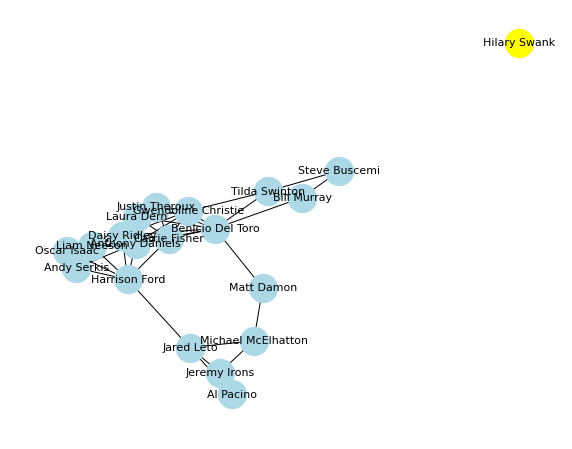

In [129]:
plt.figure(figsize=(10,8))
plt.margins(0.1, 0.1)
# determine node positions
pos = nx.spring_layout(egSG)
# draw the full network
nx.draw_networkx(egSG, pos, with_labels=True, font_size=11, node_size=800, node_color="lightblue")
# draw the subgraph set of nodes
nx.draw_networkx_nodes(egSG, pos, nodelist=required, node_size=800, node_color="yellow")
plt.axis("off")
plt.show()

As mentioned before it is clear that removing Adam Driver isolates Hilary Swank. This in turn brings down the density of the network as well as creating two different components. Still the rest of the nodes remain connected despite removing Adam Driver.

### Network 2:

In [130]:
#i have chosen Scarlett Johansson as she gas a significantly higher degree than the others in her network.
ego_node = "Scarlett Johansson"
alters = g2.neighbors(ego_node)
for node in alters:
    print(node)

Frances McDormand
Edward Norton
Demi Moore
Ben Mendelsohn
Halle Berry
F. Murray Abraham
Matthew McConaughey
Reese Witherspoon
Jennifer Hudson
Josh Brolin
David Harbour
Rachel Weisz
Elizabeth Olsen
Kerry Condon


In [131]:
#create the ego network
egG2 = nx.ego_graph(g2, ego_node)

In [132]:
#agin compare the nodes to the neighbours seen above
list(egG2.nodes())

['Kerry Condon',
 'Jennifer Hudson',
 'Matthew McConaughey',
 'F. Murray Abraham',
 'Reese Witherspoon',
 'Elizabeth Olsen',
 'Rachel Weisz',
 'Halle Berry',
 'Scarlett Johansson',
 'Frances McDormand',
 'Edward Norton',
 'Ben Mendelsohn',
 'Demi Moore',
 'David Harbour',
 'Josh Brolin']

In [133]:
nx.density(egG2)

0.2571428571428571

This ego network has a density of 0.257 which means that Scarlett Johansson is a very important node. Without her the nodes will probably not be connected.

In [134]:
nx.is_connected(egG2)

True

In [135]:
nx.number_connected_components(egG2)

1

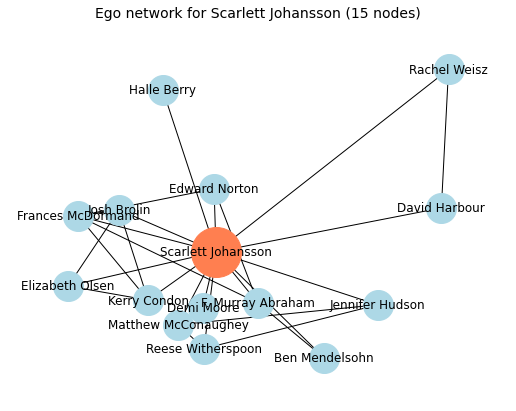

In [136]:
display_ego(g2, "Scarlett Johansson")

Next I will remove Scarlett Johansson from the ego network to analyse her affect on the the nodes around her.

In [137]:
# create the full ego network
ego_node = "Scarlett Johansson"
egSG2 = nx.ego_graph(g2, ego_node)
# now remove the ego
egSG2.remove_node(ego_node)

In [138]:
nx.density(egSG2)

0.14285714285714285

The density has dropped to a tiny 0.14 meaning that of the available edges very few are present.

In [139]:
nx.is_connected(egSG2)

False

Now after removing the ego node the graph is no longer connected.

In [140]:
nx.number_connected_components(egSG2)

5

There are now 5 components which means that Johansson kept a number of components together by herself. She is even  more important in her ego network that Driver was in his.

In [141]:
# display the nodes in each component
for component in nx.connected_components(egSG2):
    print(component)

{'Kerry Condon', 'F. Murray Abraham', 'Elizabeth Olsen', 'Frances McDormand', 'Ben Mendelsohn', 'Edward Norton', 'Josh Brolin'}
{'Jennifer Hudson', 'Matthew McConaughey', 'Reese Witherspoon'}
{'David Harbour', 'Rachel Weisz'}
{'Halle Berry'}
{'Demi Moore'}


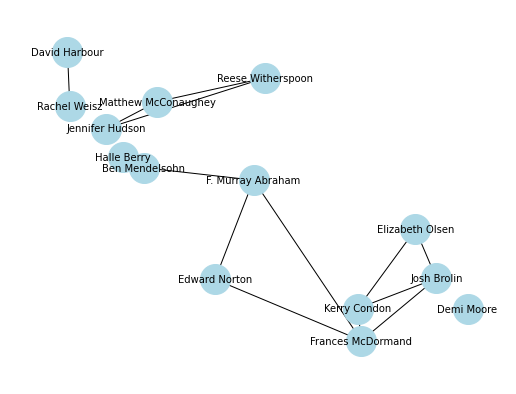

In [142]:
plt.figure(figsize=(9,7))
plt.margins(0.1, 0.1)
# position all nodes
pos = nx.spring_layout(g2)
# draw the alters
nx.draw_networkx(egSG2, pos, with_labels=True, font_size=10, node_size=900, node_color="lightblue")
plt.axis("off");

## Task 5: Network visualisation

Create a .gexf file for each network to be used in Gephi.

In [143]:
nx.write_gexf(g1, "network1.gexf", prettyprint=True)

In [144]:
nx.write_gexf(g2, "network2.gexf", prettyprint=True)